In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [232]:
# Загрузка данных
data = pd.read_csv('DataSet1_3.csv')
data['Date'] = pd.to_datetime(data['Date'])  # Преобразуем столбец 'Date' в формат datetime
# Преобразование даты в секунды
data['Timestamp'] = data['Date'].apply(lambda x: int(x.timestamp()))
data['Timestamp'] = data['Timestamp'].astype(float)
# Преобразование даты в часы
# data['Hour'] = data['Date'].dt.hour

data.head()

,Date,Open,High,Low,Close,Volume,Name,Timestamp
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,1.136246e+09
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1.136333e+09
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,1.136419e+09
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,1.136506e+09
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,1.136765e+09


Задание
----
![Alt text](Task.jpg)

Разделение на выборки
---

        Date    Open    High     Low   Close    Volume   Name     Timestamp
0 2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL  1.136246e+09
1 2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL  1.136333e+09
2 2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL  1.136419e+09
3 2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL  1.136506e+09
4 2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL  1.136765e+09
          Date    Open    High     Low   Close   Volume   Name     Timestamp
120 2006-06-26  203.58  204.35  201.83  202.31  3551178  GOOGL  1.151280e+09
121 2006-06-27  203.06  204.20  200.71  201.36  4107079  GOOGL  1.151366e+09
122 2006-06-28  202.21  203.44  200.77  203.26  3712699  GOOGL  1.151453e+09
123 2006-06-29  204.20  209.31  203.11  209.11  6662215  GOOGL  1.151539e+09
124 2006-06-30  208.01  209.87  206.37  209.87  6298846  GOOGL  1.151626e+09


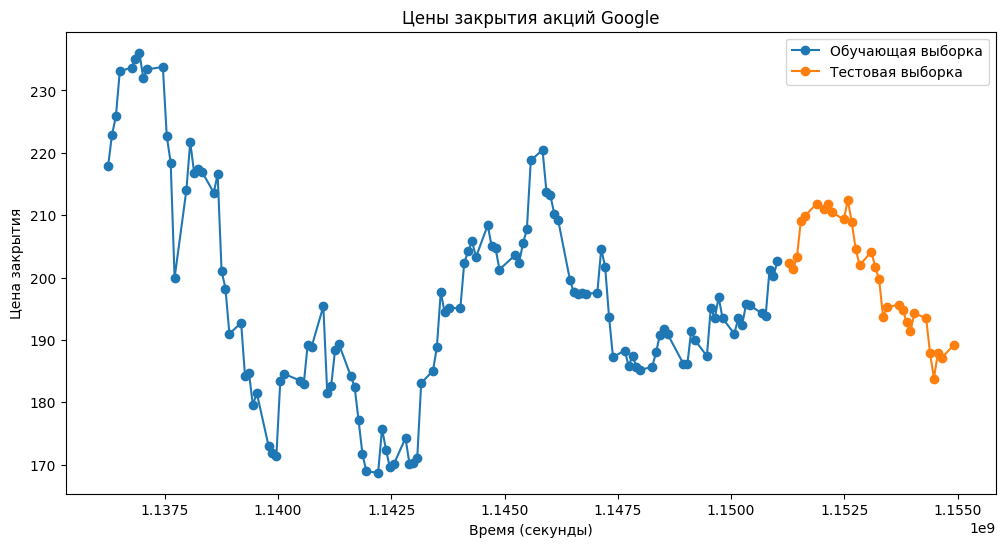

In [233]:
data150 = data.iloc[20:171]
# Берем первые 150 значений
data = data.head(150)

# Разделение данных на тренировочную (80%) и тестовую (20%) выборки
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Вывод первых нескольких строк данных
print(train_data.head())
print(test_data.head())

# Визуализация данных
plt.figure(figsize=(12, 6))
plt.plot(train_data['Timestamp'], train_data['Close'], label='Обучающая выборка', marker='o')
plt.plot(test_data['Timestamp'], test_data['Close'], label='Тестовая выборка', marker='o')
plt.xlabel('Время (секунды)')
plt.ylabel('Цена закрытия')
plt.legend()
plt.title('Цены закрытия акций Google')
plt.show()

Метод наименьших квадратов (МНК)
---

Коэффициент c0: 608706.38
Коэффициент c1: -0.00
Коэффициент c2: 0.00
Коэффициент c0: 608706.38
Коэффициент c1: -0.00
Коэффициент c2: 0.00


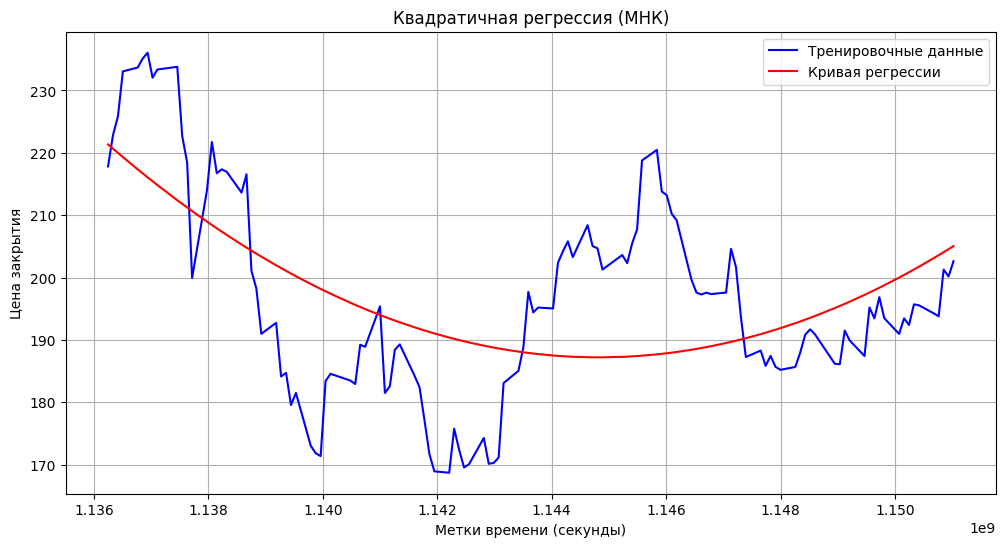

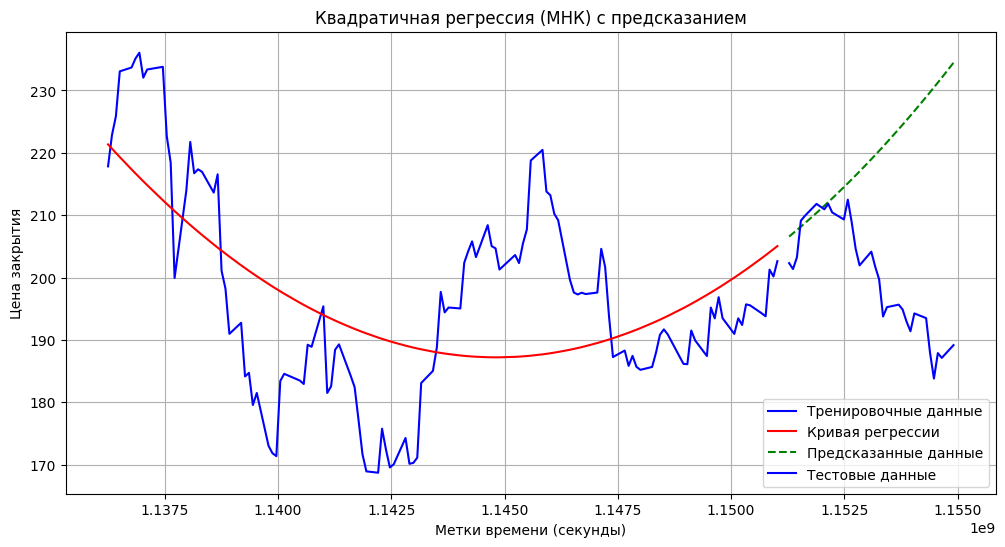

In [234]:
# Извлечение признаков и целевой переменной из тренировочных данных
X_train = train_data[['Timestamp']]
y_train = train_data['Close']

# Определение квадратичной функции для аппроксимации методом МНК
def quadratic_function(x, c0, c1, c2):
    return c0 + c1 * x + c2 * x**2

# Обучим модель МНК на обучающих данных
popt, _ = curve_fit(quadratic_function, X_train['Timestamp'], y_train)

# Получим коэффициенты c0, c1, c2
c0, c1, c2 = popt[0], popt[1], popt[2]

# Создадим данные для построения кривой регрессии
x_regression = X_train['Timestamp']
y_regression = quadratic_function(x_regression, c0, c1, c2)

# Построим график данных и кривой регрессии
plt.figure(figsize=(12, 6))
plt.plot(X_train['Timestamp'], y_train, label='Тренировочные данные', color='blue')
plt.plot(X_train['Timestamp'], y_regression, label='Кривая регрессии', color='red')
plt.xlabel('Метки времени (секунды)')
plt.ylabel('Цена закрытия')
plt.legend()
plt.title('Квадратичная регрессия (МНК)')
plt.grid(True)

# Выведем полученные коэффициенты
print(f'Коэффициент c0: {c0:.2f}')
print(f'Коэффициент c1: {c1:.2f}')
print(f'Коэффициент c2: {c2:.2f}')

# Создадим данные для предсказания
X_test = test_data[['Timestamp']]
y_test = test_data['Close']

# Используем аппроксимированную квадратичную функцию для предсказания
y_pred = quadratic_function(X_test['Timestamp'], c0, c1, c2)

# Построим график предсказанных значений
plt.figure(figsize=(12, 6))
plt.plot(X_train['Timestamp'], y_train, label='Тренировочные данные', color='blue')
plt.plot(X_train['Timestamp'], y_regression, label='Кривая регрессии', color='red')
plt.plot(X_test['Timestamp'], y_pred, label='Предсказанные данные', color='green', linestyle='--')
plt.plot(X_test['Timestamp'], y_test, label='Тестовые данные', color='blue')
plt.xlabel('Метки времени (секунды)')
plt.ylabel('Цена закрытия')
plt.legend()
plt.title('Квадратичная регрессия (МНК) с предсказанием')
plt.grid(True)

# Выведем полученные коэффициенты
print(f'Коэффициент c0: {c0:.2f}')
print(f'Коэффициент c1: {c1:.2f}')
print(f'Коэффициент c2: {c2:.2f}')

plt.show()

Метод k-ближайших соседей (kNN)
---

Среднеквадратичная ошибка: 67.22928834285725


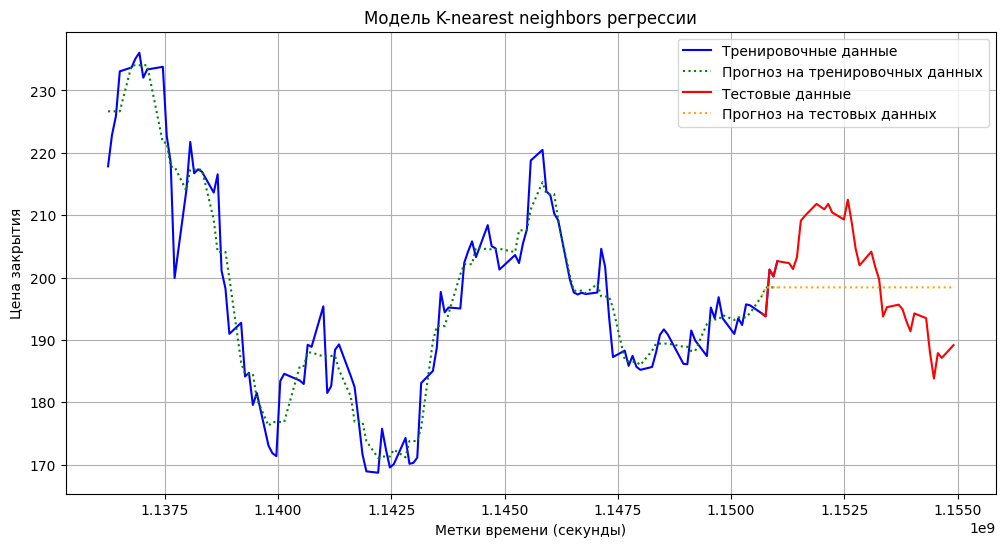

In [235]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Извлечение признаков и целевой переменной из обучающих данных
X_train = train_data[['Timestamp']]
y_train = train_data['Close']

# Извлечение признаков и целевой переменной из тестовых данных
X_test = test_data[['Timestamp']]
y_test = test_data['Close']

# Определите количество соседей (k)
k = 5

# Создайте модель K-nearest neighbors регрессии
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Обучите модель на обучающих данных
knn_regressor.fit(X_train, y_train)

# Добавляем значения из обучающей выборки к началу тестовой выборки
X_test = pd.concat([X_train[-5:], X_test], ignore_index=True)
# Добавляем значения из обучающей выборки к началу тестовой выборки
y_test = pd.concat([y_train[-5:], y_test], ignore_index=True)

# Предсказание с использованием модели на обучающих и тестовых данных
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print("Среднеквадратичная ошибка:", mse)

# Построение графика для обучающих и тестовых данных
plt.figure(figsize=(12, 6))
plt.plot(X_train, y_train, label='Тренировочные данные', color='blue')
plt.plot(X_train, y_train_pred, label='Прогноз на тренировочных данных', color='green', linestyle='dotted')
plt.plot(X_test, y_test, label='Тестовые данные', color='red')
plt.plot(X_test, y_test_pred, label='Прогноз на тестовых данных', color='orange', linestyle='dotted')
plt.xlabel('Метки времени (секунды)')
plt.ylabel('Цена закрытия')
plt.legend()
plt.title('Модель K-nearest neighbors регрессии')
plt.grid(True)
plt.show()

Модель ARIMA (авторегрессия с интегрированным скользящим средним)
---

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=744.880, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1610.740, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=747.537, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=743.281, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=746.065, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=744.887, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=737.445, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=739.862, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=739.862, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=738.561, Time=0.25 sec
 

c:\Users\ASUS\Desktop\Studie\ML\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\ASUS\Desktop\Studie\ML\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\ASUS\Desktop\Studie\ML\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\ASUS\Desktop\Studie\ML\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\ASUS\Desktop\Studie\ML\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\ASUS\Desktop\

Прогноз (Обучающая выборка): 217.22, Фактическое: 216.55
Прогноз (Обучающая выборка): 219.82, Фактическое: 201.09
Прогноз (Обучающая выборка): 206.22, Фактическое: 198.22
Прогноз (Обучающая выборка): 201.48, Фактическое: 190.97
Прогноз (Обучающая выборка): 195.08, Фактическое: 192.74
Прогноз (Обучающая выборка): 193.94, Фактическое: 184.14
Прогноз (Обучающая выборка): 188.29, Фактическое: 184.72
Прогноз (Обучающая выборка): 184.31, Фактическое: 179.56
Прогноз (Обучающая выборка): 184.15, Фактическое: 181.49
Прогноз (Обучающая выборка): 180.08, Фактическое: 173.02
Прогноз (Обучающая выборка): 177.63, Фактическое: 171.83
Прогноз (Обучающая выборка): 173.12, Фактическое: 171.36
Прогноз (Обучающая выборка): 174.74, Фактическое: 183.41
Прогноз (Обучающая выборка): 181.07, Фактическое: 184.56
Прогноз (Обучающая выборка): 187.87, Фактическое: 183.48
Прогноз (Обучающая выборка): 181.25, Фактическое: 182.93
Прогноз (Обучающая выборка): 186.55, Фактическое: 189.22
Прогноз (Обучающая выборка): 18

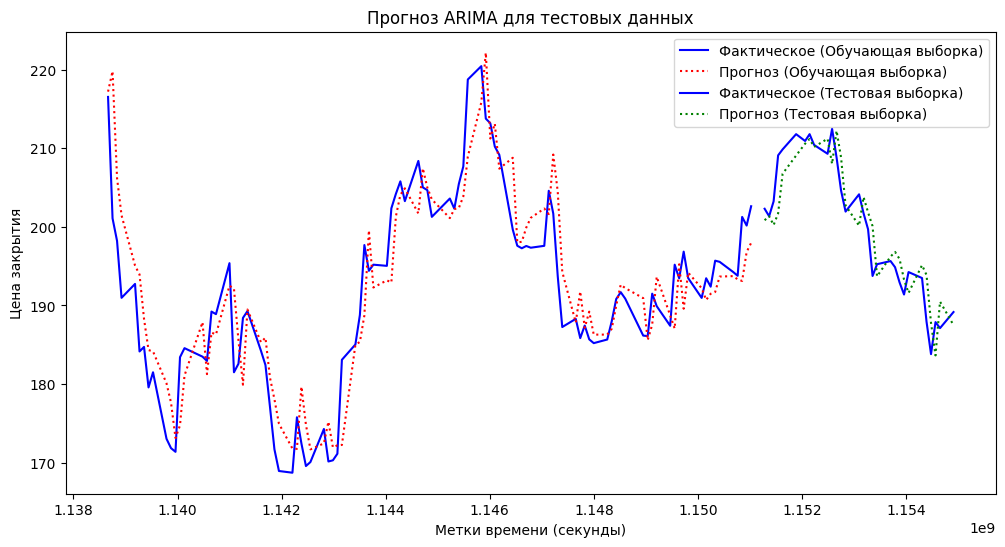

In [236]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Извлечение признаков и целевой переменной из обучающих данных
X_train = train_data[['Timestamp']]
y_train = train_data['Close']

# Извлечение признаков и целевой переменной из тестовых данных
X_test = test_data[['Timestamp']]
y_test = test_data['Close']

# Создаем и обучаем модель ARIMA с автоподбором параметров
model = auto_arima(y_train, seasonal=False, stepwise=True, trace=True)

# Оптимальные параметры p, d, и q
p, d, q = model.order

# Параметры ARIMA
# p, d, q = 2, 0, 1

# Размер окна для прогнозирования
window_size = 19

# Добавляем значения из обучающей выборки к началу тестовой выборки
y_test = pd.concat([y_train[-window_size:], y_test], ignore_index=True)

# Массивы для хранения прогнозов и фактических значений
predictions_train = np.array([])
actual_values_train = np.array([])
predictions_test = np.array([])
actual_values_test = np.array([])

# Прогнозирование с использованием Rolling Forecast ARIMA на обучающих данных
for i in range(len(y_train)):
    if i >= window_size:
        # Окно для обучения (последние `window_size` точек)
        window = y_train[i - window_size:i]
        
        # Обучение ARIMA модели для окна
        model = ARIMA(window, order=(p, d, q))
        model_fit = model.fit()
        
        # Предсказание следующего значения на обучающих данных
        forecast = model_fit.forecast(steps=1)
        
        # Добавление прогноза в массив прогнозов и фактического значения в массив фактических значений на обучающих данных
        predictions_train = np.append(predictions_train, forecast)
        actual_values_train = np.append(actual_values_train, y_train.iloc[i])

# Прогнозирование на тестовых данных
for i in range(len(y_test)):
    if i >= window_size:
        # Окно для обучения (последние `window_size` точек)
        window = y_test[i - window_size:i]
        
        # Обучение ARIMA модели для окна
        model = ARIMA(window, order=(p, d, q))
        model_fit = model.fit()
        
        # Предсказание следующего значения на тестовых данных
        forecast = model_fit.forecast(steps=1)
        
        # Добавление прогноза в массив прогнозов и фактического значения в массив фактических значений на тестовых данных
        predictions_test = np.append(predictions_test, forecast)
        actual_values_test = np.append(actual_values_test, y_test.iloc[i])

# Прогноз и фактические значения на обучающих данных
for i in range(len(predictions_train)):
    print(f"Прогноз (Обучающая выборка): {predictions_train[i]:.2f}, Фактическое: {actual_values_train[i]:.2f}")

# Прогноз и фактические значения на тестовых данных
for i in range(len(predictions_test)):
    print(f"Прогноз (Тестовая выборка): {predictions_test[i]:.2f}, Фактическое: {actual_values_test[i]:.2f}")

# График прогнозов и фактических значений на тестовых данных
plt.figure(figsize=(12, 6))
indexTrain = train_data['Timestamp'][window_size:]
indexTest = test_data['Timestamp']
plt.plot(indexTrain, actual_values_train, label='Фактическое (Обучающая выборка)', color='blue')
plt.plot(indexTrain, predictions_train, label='Прогноз (Обучающая выборка)', color='red', linestyle='dotted')
plt.plot(indexTest, actual_values_test, label='Фактическое (Тестовая выборка)', color='blue')
plt.plot(indexTest, predictions_test, label='Прогноз (Тестовая выборка)', color='green', linestyle='dotted')
plt.xlabel('Метки времени (секунды)')
plt.ylabel('Цена закрытия')
plt.title('Прогноз ARIMA для тестовых данных')
plt.legend()
plt.show()